## Task 4: model preparation

In [1]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

In [2]:
pd.set_option("display.max_columns",60)

In [3]:
# Reading all the tables
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
order = pd.read_csv("olist_orders_dataset.csv")
product = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

## Customer table

In [5]:
# overview to the data
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
# description of data
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [7]:
customers.shape

(99441, 5)

In [8]:
# no null values
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [9]:
# no duplicate values
customers['customer_unique_id'].duplicated().sum()

3345

In [10]:
customers.drop_duplicates(subset='customer_unique_id', keep=False, inplace=True)
customers['customer_unique_id'].duplicated().sum()

0

## geolocations table

In [11]:
# overview to data
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [12]:
# check for null values
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

## Item table

In [13]:
# overview to the data
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
# description of data
items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [15]:
# we have to change the data type of feature: shipping_limit_date
# converting shipping_limit_date into datetime format that was previously object type.
items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'], format='%Y-%m-%d %H:%M:%S')
items['shipping_limit_date']

0        2017-09-19 09:45:35
1        2017-05-03 11:05:13
2        2018-01-18 14:48:30
3        2018-08-15 10:10:18
4        2017-02-13 13:57:51
                 ...        
112645   2018-05-02 04:11:01
112646   2018-07-20 04:31:48
112647   2017-10-30 17:14:25
112648   2017-08-21 00:04:32
112649   2018-06-12 17:10:13
Name: shipping_limit_date, Length: 112650, dtype: datetime64[ns]

In [16]:
def time(t):
    if int(t)>=5 and int(t)<12:
        return 'morning'
    elif int(t)>=12 and int(t)<17:
        return 'afternoon'
    elif int(t)>=17 and int(t)<24:
        return 'evening'
    else:
        return 'midnight'

In [17]:
# creating columns year and month
items['year'] = items['shipping_limit_date'].dt.year
items['month'] = items['shipping_limit_date'].dt.month
items['timing'] = (items['shipping_limit_date'].dt.hour).apply(lambda x: time(x))

In [18]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,year,month,timing
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017,9,morning
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017,5,morning
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018,1,afternoon
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018,8,morning
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017,2,afternoon


## Order table

In [19]:
# overview to the data
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [20]:
# check for null values
order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [21]:
# filling null values

In [22]:
# converting all the date related features from object type to date time format
order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
order['order_approved_at'] = pd.to_datetime(order['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
order['order_delivered_carrier_date'] = pd.to_datetime(order['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S')
order['order_delivered_customer_date'] = pd.to_datetime(order['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
order['order_estimated_delivery_date'] = pd.to_datetime(order['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')

In [23]:
# we have taken median of differences between order_approved_at and order_purchased and then filled the nan values with sum of order_purchased and diff
diff = (order['order_approved_at'] - order['order_purchase_timestamp']).median()
order['order_approved_at'].fillna(order['order_purchase_timestamp'] + diff,inplace=True)

In [24]:
# we have taken median of differences between order_delivered_carrier_date and order_approved_at and then filled the nan values with sum of order_approved_at and diff
diff = (order['order_delivered_carrier_date'] - order['order_approved_at']).median()
order['order_delivered_carrier_date'].fillna(order['order_approved_at'] + diff,inplace=True)

In [25]:
# we have taken median of differences between order_delivered_customer_date and order_delivered_carrier_date and then filled the nan values with sum of order_delivered_carrier_date and diff
diff = (order['order_delivered_customer_date'] - order['order_delivered_carrier_date']).median()
order['order_delivered_customer_date'].fillna(order['order_delivered_carrier_date'] + diff,inplace=True)

In [26]:
# creating one more column delayed or not where 0=within time and 1=delayed
order['delayed'] = np.where(order['order_delivered_customer_date']>order['order_estimated_delivery_date'],1,0)

In [27]:
# creating new column ie. delivery time duration = time duration between delivered to customer date and purchase timestamp
order['delivery_time_duration'] = order['order_delivered_customer_date'] - order['order_purchase_timestamp']

In [28]:
# check for duplicated values
order.duplicated().sum()

0

In [29]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delayed,delivery_time_duration
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0,9 days 09:27:40
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0,13 days 05:00:36
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0,2 days 20:58:23


## product table

In [30]:
# overview to product table
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [31]:
# describing product table
product.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [32]:
# check for null values
product.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [33]:
# filling minute null values 
product['product_weight_g'].fillna(product['product_weight_g'].mean(),inplace=True)
product['product_length_cm'].fillna(product['product_length_cm'].mean(),inplace=True)
product['product_height_cm'].fillna(product['product_height_cm'].mean(),inplace=True)
product['product_width_cm'].fillna(product['product_width_cm'].mean(),inplace=True)

## reviews table

In [34]:
# overview to the data
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [35]:
# null values check
reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [36]:
# reviews score as well as review creation date and timestamp are important features and there are no null values.
# there is no need to fill the null values in comment_message and creation_date

In [37]:
# merging all tables.
data = pd.merge(items,order,on='order_id')
data = pd.merge(data,product,on='product_id')
data = pd.merge(data,payments,on='order_id')
data = pd.merge(data,reviews,on='order_id')
data = pd.merge(data,customers,on='customer_id')
data = pd.merge(data,sellers,on='seller_id')

In [38]:
data.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'year', 'month',
       'timing', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delayed', 'delivery_time_duration', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [39]:
data.shape

(109688, 44)

In [40]:
data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,year,month,timing,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delayed,delivery_time_duration,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,2017,9,morning,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,0,7 days 14:44:46,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,2017,7,midnight,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26,0,15 days 08:47:09,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1,boleto,1,73.86,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO,27277,volta redonda,SP
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,2018,5,morning,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07,0,17 days 08:08:33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1,credit_card,2,83.23,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG,27277,volta redonda,SP
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,2017,8,evening,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25,0,8 days 02:47:51,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1,credit_card,3,75.07,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR,27277,volta redonda,SP
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,2017,8,evening,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01,0,13 days 22:15:41,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1,credit_card,4,72.19,426f43a82185969503fb3c86241a9535,5,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG,27277,volta redonda,SP


In [41]:
data['review_score'].value_counts()

5    61295
4    20893
1    14361
3     9253
2     3886
Name: review_score, dtype: int64

In [43]:
# although we have no review_score value that are null, but in future it might be possible that we may not be provided with
# review_score as customer must not have provided reviews, thus we will try to predict positive_review with the help of
# data with us
data['positive_review'] = np.where(data['review_score']>=3,1,0)
data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,year,month,timing,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delayed,delivery_time_duration,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,positive_review
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,2017,9,morning,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,0,7 days 14:44:46,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,1
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,2017,7,midnight,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26,0,15 days 08:47:09,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1,boleto,1,73.86,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO,27277,volta redonda,SP,1
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,2018,5,morning,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07,0,17 days 08:08:33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1,credit_card,2,83.23,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG,27277,volta redonda,SP,1
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,2017,8,evening,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25,0,8 days 02:47:51,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1,credit_card,3,75.07,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR,27277,volta redonda,SP,1
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,2017,8,evening,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01,0,13 days 22:15:41,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1,credit_card,4,72.19,426f43a82185969503fb3c86241a9535,5,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG,27277,volta redonda,SP,1


## Customer satisfaction prediction
we will try to predict satisfaction of customers by classifying them on the basis of positive and negative reviews

<AxesSubplot:>

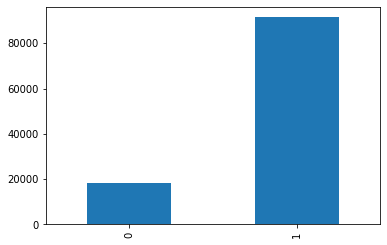

In [44]:
data['positive_review'].value_counts().plot.bar()

In [130]:
# looking at each and every indepandant , checking whether they are normalized or not

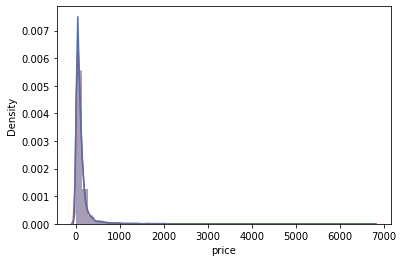

In [45]:
sns.set_color_codes()
sns.distplot(data[data['positive_review']==0]['price'],color='r')
sns.distplot(data[data['positive_review']==1]['price'],color='b')
plt.show()

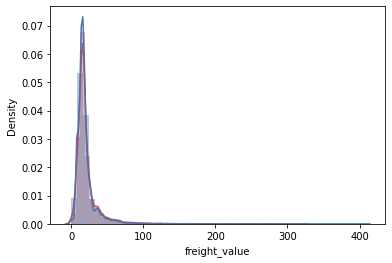

In [46]:
sns.distplot(data[data['positive_review']==0]['freight_value'],color='r')
sns.distplot(data[data['positive_review']==1]['freight_value'],color='b')
plt.show()

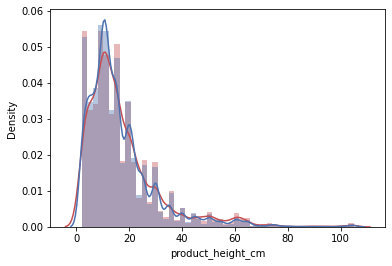

In [47]:
sns.distplot(data[data['positive_review']==0]['product_height_cm'],color='r')
sns.distplot(data[data['positive_review']==1]['product_height_cm'],color='b')
plt.show()

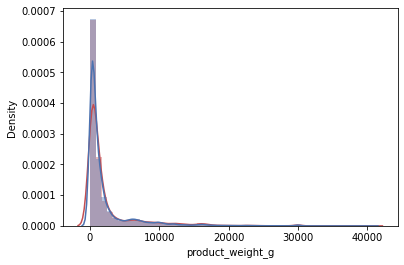

In [48]:
sns.distplot(data[data['positive_review']==0]['product_weight_g'],color='r')
sns.distplot(data[data['positive_review']==1]['product_weight_g'],color='b')
plt.show()

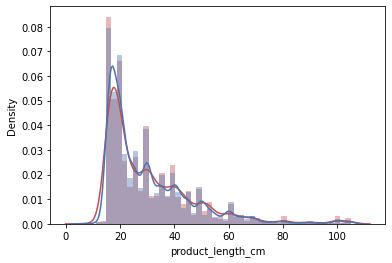

In [49]:
sns.distplot(data[data['positive_review']==0]['product_length_cm'],color='r')
sns.distplot(data[data['positive_review']==1]['product_length_cm'],color='b')
plt.show()

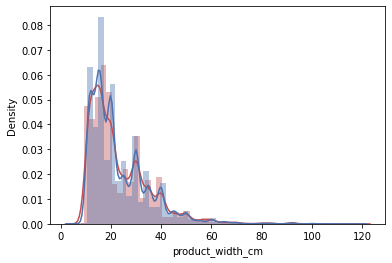

In [50]:
sns.distplot(data[data['positive_review']==0]['product_width_cm'],color='r')
sns.distplot(data[data['positive_review']==1]['product_width_cm'],color='b')
plt.show()

In [129]:
# bivarient analysis

<AxesSubplot:xlabel='price', ylabel='freight_value'>

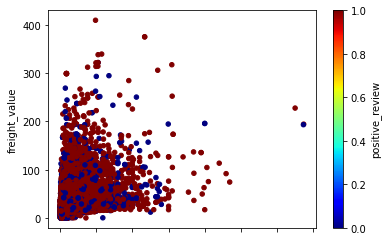

In [51]:
data.plot.scatter(x='price',y='freight_value',c='positive_review',colormap='jet')

<AxesSubplot:xlabel='price', ylabel='product_weight_g'>

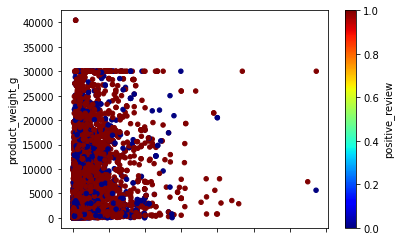

In [52]:
data.plot.scatter(x='price',y='product_weight_g',c='positive_review',colormap='jet')

In [53]:
data.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'year', 'month',
       'timing', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delayed', 'delivery_time_duration', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'positive_revie

In [54]:
col = ['price','freight_value','delayed', 'product_weight_g', 'product_length_cm','product_height_cm', 'product_width_cm', 
       'payment_value']

In [55]:
x = data[col]
y = data['positive_review']

In [58]:
## train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=38)

## Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [106]:
y_pred = model1.predict(x_test)

In [112]:
a1 = accuracy_score(y_test,y_pred)
a1

0.8313428753760598

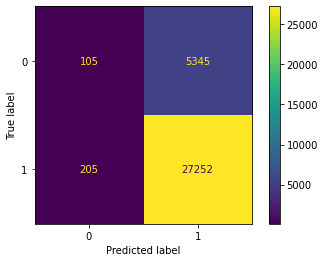

In [64]:
plot_confusion_matrix(model1,x_test,y_test)

In [109]:
from sklearn.metrics import precision_score,recall_score,f1_score
p1 = precision_score(y_test,y_pred)
p1

0.8360278553241096

In [110]:
r1 = recall_score(y_test,y_pred)
r1

0.9925337800925083

In [111]:
fs1 = f1_score(y_test,y_pred)
fs1

0.9075831751423719

## Decision Tree Classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [113]:
y_pred = model2.predict(x_test)

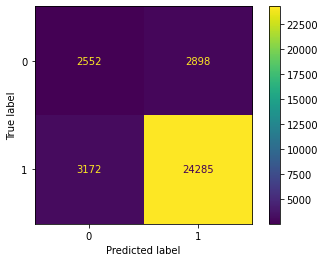

In [84]:
plot_confusion_matrix(model2,x_test,y_test)

In [114]:
a2 = accuracy_score(y_test,y_pred)
a2

0.8155407664022852

In [103]:
p2 = precision_score(y_test,y_pred)
p2

0.8933892506345877

In [104]:
r2 = recall_score(y_test,y_pred)
r2

0.8844739046509087

In [105]:
fs2 = f1_score(y_test,y_pred)
fs2

0.8889092240117129

## Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier()

In [115]:
y_pred = model3.predict(x_test)

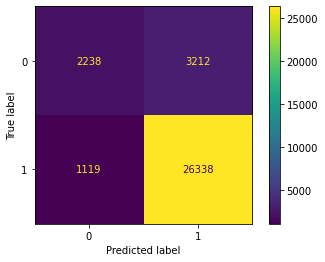

In [76]:
plot_confusion_matrix(model3,x_test,y_test)

In [117]:
a3 = accuracy_score(y_test,y_pred)
a3

0.8683866654511199

In [99]:
p3 = precision_score(y_test,y_pred)
p3

0.8913028764805414

In [100]:
r3 = recall_score(y_test,y_pred)
r3

0.9592453654805696

In [101]:
fs3 = f1_score(y_test,y_pred)
fs3

0.9240268738926799

## Support Vector Classifier

In [89]:
from sklearn.svm import SVC
model4 = SVC()
model4.fit(x_train,y_train)

SVC()

In [118]:
y_pred = model4.predict(x_test)

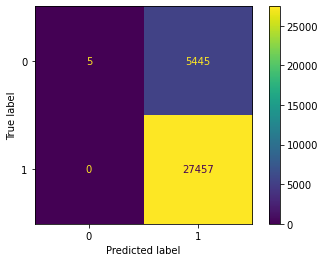

In [91]:
plot_confusion_matrix(model4,x_test,y_test)

In [119]:
a4 = accuracy_score(y_test,y_pred)
a4

0.8345336858419181

In [95]:
p4 = precision_score(y_test,y_pred)
p4

0.8345085405142545

In [96]:
r4 = recall_score(y_test,y_pred)
r4

1.0

In [97]:
fs4 = f1_score(y_test,y_pred)
fs4 

0.9097897579482762

In [123]:
# converting results in form of data frame
result = pd.DataFrame([['Logistic_Regression',a1,p1,r1,fs1],
                 ['Decision_Tree_Classifier',a2,p2,r2,fs2],
                 ['Random_Forest_Classifier',a3,p3,r3,fs3],
                 ['Support_Vector_Classifier',a4,p4,r4,fs4]],columns=['model','accuracy','precision','recall','f1_score'])

In [124]:
result

,model,accuracy,precision,recall,f1_score
0,Logistic_Regression,0.831343,0.836028,0.992534,0.907583
1,Decision_Tree_Classifier,0.815541,0.893389,0.884474,0.888909
2,Random_Forest_Classifier,0.868387,0.891303,0.959245,0.924027
3,Support_Vector_Classifier,0.834534,0.834509,1.000000,0.909790


### concluding that random forest classifier works much more better than other three algorithms being applied